In [1]:
import numpy as np
from sklearn.datasets import make_blobs, make_regression, make_classification
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

# KMeans

In [2]:
from src.models import KMeans

<AxesSubplot:>

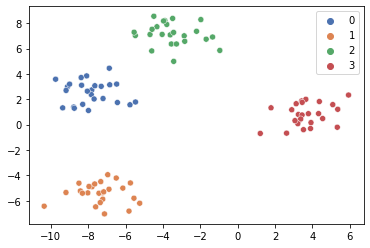

In [3]:
X, y = make_blobs(n_samples=100, n_features=2, centers=4, random_state=43, )

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='deep')

In [5]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=73)

kmeans_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("kmeans", kmeans),
])

<AxesSubplot:>

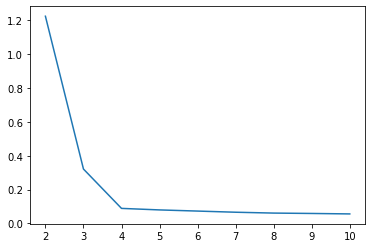

In [6]:
cluster_num = [2, 3, 4, 5, 6, 7, 8, 9, 10]
interia = list()

for cluster in cluster_num:
    kmeans_pipeline["kmeans"].n_clusters = cluster
    kmeans_pipeline.fit(X)
    interia.append(kmeans.interia_)

sns.lineplot(x=cluster_num, y=interia)

In [7]:
kmeans_pipeline["kmeans"].n_clusters = 4

kmeans_pipeline.fit(X)
points = kmeans_pipeline.predict(X)

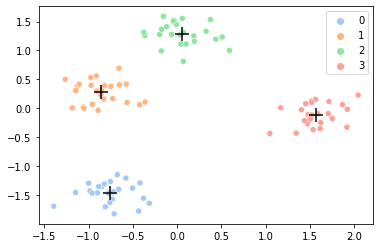

In [10]:
centroids = kmeans_pipeline["kmeans"].centroids
data = kmeans_pipeline["scaler"].transform(X)

sns.scatterplot(
    x=data[:,0], 
    y=data[:,1], 
    hue=points, 
    palette='pastel')
plt.scatter(
    centroids[:,0], 
    centroids[:,1], 
    # color="red", 
    marker="+", 
    s=200,
    color="black"
)

# KNNRegressor

In [11]:
from src.models.knn import KNNRegressor

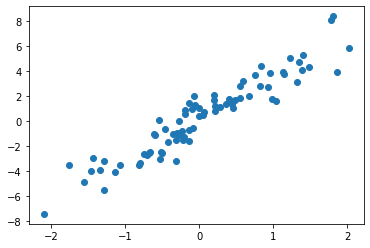

In [12]:
X, y = make_regression(n_samples=100, n_features=1, noise=1, random_state=34)
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
plt.scatter(x=X_train, y=y_train)

In [13]:
knnr = KNNRegressor()
knnr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knnr", knnr),
])

<AxesSubplot:>

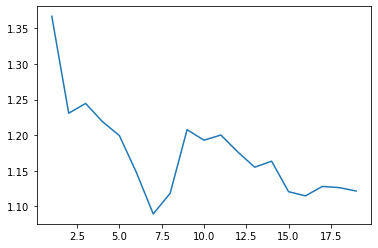

In [15]:
error = list()

knnr_pipeline.fit(X_train, y_train)
for i in range(1, 20):
    knnr_pipeline["knnr"].k_neighbours = i
    error.append(knnr_pipeline.score(X_test, y_test))
    
sns.lineplot(x=list(range(1,20)), y=error)

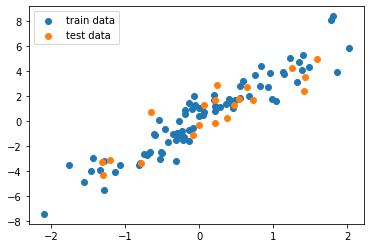

In [16]:
knnr_pipeline["knnr"].k_neighbours = 7
prediction = knnr_pipeline.predict(X_test)

plt.scatter(x=X_train, y=y_train, label="train data")
plt.scatter(x=X_test, y=y_test, label="test data")
plt.legend()
plt.show()

# KNNClassifier

In [17]:
from src.models.knn import KNNClassifier

<AxesSubplot:>

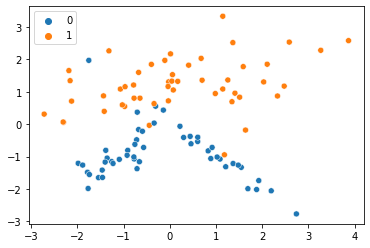

In [19]:
X, y = make_classification(
    n_samples=100, 
    n_features=2, 
    random_state=43, 
    n_informative=2,
    n_redundant=0
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [20]:
from src.models.knn import KNNClassifier

In [21]:
knnc = KNNClassifier()

knnc_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knnc", knnc),
])

<AxesSubplot:>

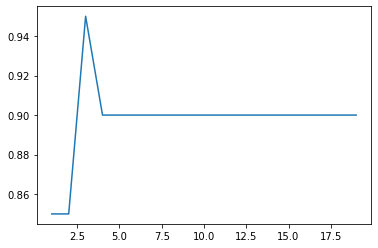

In [28]:
knnc_pipeline.fit(X_train, y_train)

scores = list()

for i in range(1, 20):
    knnc_pipeline["knnc"].k_neighbours = i
    scores.append(knnc_pipeline.score(X_test, y_test))
    
sns.lineplot(x=list(range(1,20)), y=scores)

<AxesSubplot:>

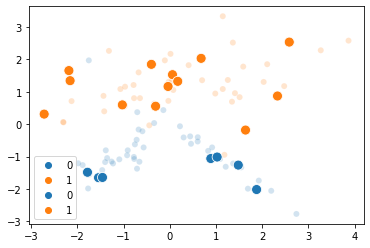

In [30]:
knnc_pipeline["knnc"].k_neighbours = 3
prediction = knnc.predict(X_test)

sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train, alpha=0.2)
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=prediction, s=100)